# **Malaysia Public Transport Optimization**

This notebook focuses on Data Reduction to streamline the dataset for more efficient modeling and visualization. It includes filtering low-impact transport modes based on peak monthly ridership thresholds, removing redundant or sparse columns to reduce noise in the dataset.

The objective is to prepare a leaner, cleaner dataset that maintains analytical value while improving model performance and processing speed for the next phase of forecasting and dashboard creation.




## **Data Reduction**

### Import dataset and libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/lunwe/Desktop/Malaysia-Public-Transport-Optimization")

In [4]:
df = pd.read_csv("data/processed/ridership_transformed.csv")

#Show all column
pd.set_option('display.max_columns', None)
df.head()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,total_ridership,year,month,weekday,is_weekend,total_rapidbus,total_urbanrail,total_nationalrail
0,2019-01-01,NaN,NaN,NaN,113357,114173,139634,35804,0.0,NaN,NaN,NaN,NaN,NaN,402968.0,2019,1,Tuesday,False,0.0,402968.0,0.0
1,2019-01-02,NaN,NaN,NaN,182715,169316,274224,31859,0.0,NaN,NaN,NaN,NaN,NaN,658114.0,2019,1,Wednesday,False,0.0,658114.0,0.0
2,2019-01-03,NaN,NaN,NaN,187904,175304,286469,31893,0.0,NaN,NaN,NaN,NaN,NaN,681570.0,2019,1,Thursday,False,0.0,681570.0,0.0
3,2019-01-04,NaN,NaN,NaN,198420,187891,304755,34121,0.0,NaN,NaN,NaN,NaN,NaN,725187.0,2019,1,Friday,False,0.0,725187.0,0.0
4,2019-01-05,NaN,NaN,NaN,120773,112660,145036,29950,0.0,NaN,NaN,NaN,NaN,NaN,408419.0,2019,1,Saturday,True,0.0,408419.0,0.0


In [5]:
# Changing date column to datetime format

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2373 non-null   datetime64[ns]
 1   bus_rkl             1277 non-null   float64       
 2   bus_rkn             1277 non-null   float64       
 3   bus_rpn             1277 non-null   float64       
 4   rail_lrt_ampang     2373 non-null   int64         
 5   rail_mrt_kajang     2373 non-null   int64         
 6   rail_lrt_kj         2373 non-null   int64         
 7   rail_monorail       2373 non-null   int64         
 8   rail_mrt_pjy        2373 non-null   float64       
 9   rail_ets            1720 non-null   float64       
 10  rail_intercity      1720 non-null   float64       
 11  rail_komuter_utara  1720 non-null   float64       
 12  rail_tebrau         1108 non-null   float64       
 13  rail_komuter        660 non-null    float64     

### Filter out Low-Impact Transoport Mode

In [7]:
# Reconfirm transport columns
transport_cols = df.columns.drop(['date', 'total_ridership', 'year', 'month', 
                                  'weekday', 'is_weekend', 'total_rapidbus', 'total_urbanrail', 
                                  'total_nationalrail'], errors='ignore')

# Group by month to get average ridership
df_monthly = df.groupby(pd.Grouper(key='date', freq='M'))[transport_cols].mean()

# Find max month for each transport line
highest_monthly = df_monthly.idxmax()
highest_values = df_monthly.max()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Highest Month': highest_monthly,
    'Highest Avg Trips': highest_values.astype(int)
})

summary.index.name = 'Transport Line'
#Filtering Data
low_usage = summary[summary['Highest Avg Trips'] < 50000]

print("Transport modes with less than 50,000 peak monthly trips:")
print(low_usage)

Transport modes with less than 50,000 peak monthly trips:
                   Highest Month  Highest Avg Trips
Transport Line                                     
bus_rkn               2024-08-31               2967
bus_rpn               2025-01-31              48397
rail_ets              2024-02-29              12655
rail_intercity        2024-02-29               5246
rail_komuter_utara    2025-02-28              17039
rail_tebrau           2023-12-31               9366
rail_komuter          2024-01-31              36289


### Remove Low-Impact Column

In [9]:
low_impact_cols = np.array([
    'bus_rkn',
    'bus_rpn',
    'rail_ets',
    'rail_intercity',
    'rail_komuter_utara',
    'rail_tebrau',
    'rail_komuter'
])

# Drop them from the DataFrame
df = df.drop(columns=low_impact_cols)

# Check the new shape and preview
print("Reduced dataset shape:", df.shape)
df.head()

Reduced dataset shape: (2373, 15)


,date,bus_rkl,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total_ridership,year,month,weekday,is_weekend,total_rapidbus,total_urbanrail,total_nationalrail
0,2019-01-01,NaN,113357,114173,139634,35804,0.0,402968.0,2019,1,Tuesday,False,0.0,402968.0,0.0
1,2019-01-02,NaN,182715,169316,274224,31859,0.0,658114.0,2019,1,Wednesday,False,0.0,658114.0,0.0
2,2019-01-03,NaN,187904,175304,286469,31893,0.0,681570.0,2019,1,Thursday,False,0.0,681570.0,0.0
3,2019-01-04,NaN,198420,187891,304755,34121,0.0,725187.0,2019,1,Friday,False,0.0,725187.0,0.0
4,2019-01-05,NaN,120773,112660,145036,29950,0.0,408419.0,2019,1,Saturday,True,0.0,408419.0,0.0


### Remove Insufficient Data Column

In [11]:
# Drop them from the DataFrame
df_reduced = df.drop(columns='bus_rkl')

# Check the new shape and preview
print("Reduced dataset shape:", df_reduced.shape)
df_reduced.head(1580)

Reduced dataset shape: (2373, 14)


,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,total_ridership,year,month,weekday,is_weekend,total_rapidbus,total_urbanrail,total_nationalrail
0,2019-01-01,113357,114173,139634,35804,0.0,402968.0,2019,1,Tuesday,False,0.0,402968.0,0.0
1,2019-01-02,182715,169316,274224,31859,0.0,658114.0,2019,1,Wednesday,False,0.0,658114.0,0.0
2,2019-01-03,187904,175304,286469,31893,0.0,681570.0,2019,1,Thursday,False,0.0,681570.0,0.0
3,2019-01-04,198420,187891,304755,34121,0.0,725187.0,2019,1,Friday,False,0.0,725187.0,0.0
4,2019-01-05,120773,112660,145036,29950,0.0,408419.0,2019,1,Saturday,True,0.0,408419.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,2023-04-25,100388,148498,159110,43353,63305.0,734437.0,2023,4,Tuesday,False,179213.0,514654.0,40570.0
1576,2023-04-26,108400,163548,178284,43564,69334.0,793536.0,2023,4,Wednesday,False,192573.0,563130.0,37833.0
1577,2023-04-27,112148,172089,189643,44351,72964.0,825996.0,2023,4,Thursday,False,195673.0,591195.0,39128.0
1578,2023-04-28,113102,172070,189982,46201,73785.0,835187.0,2023,4,Friday,False,198863.0,595140.0,41184.0


Since the low-impact transport mode columns have been removed, the previously created **aggregate cluster columns** (total_rapidbus, total_urbanrail, and total_nationalrail) are no longer accurate and should be dropped. 

These cluster aggregates were primarily used for exploratory insights during the data transformation phase. With the underlying data removed, they are no longer relevant or sufficient for further analysis. Moving forward, only the recalculated **total_ridership** column—based on the remaining high-impact transport modes—will be retained for subsequent modeling tasks.

### Recalculate Aggregate Ridership Totals

In [16]:
# Drop both low-impact transport columns and aggregate cluster columns
df_reduced = df_reduced.drop(columns=np.append(low_impact_cols, [
    'total_ridership','total_rapidbus', 'total_urbanrail', 'total_nationalrail'
]), errors='ignore')

# Step 2: Recalculate total_ridership using only the remaining transport columns
exclude_cols = ['date', 'year', 'month', 'weekday', 'is_weekend']
transport_cols_reduced = df_reduced.columns.difference(exclude_cols)

df_reduced['total_ridership'] = df_reduced[transport_cols_reduced].sum(axis=1)

# Step 3: Check result
print("Updated dataset shape:", df_reduced.shape)
df_reduced.head(1580)

Updated dataset shape: (2373, 11)


,date,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,year,month,weekday,is_weekend,total_ridership
0,2019-01-01,113357,114173,139634,35804,0.0,2019,1,Tuesday,False,402968.0
1,2019-01-02,182715,169316,274224,31859,0.0,2019,1,Wednesday,False,658114.0
2,2019-01-03,187904,175304,286469,31893,0.0,2019,1,Thursday,False,681570.0
3,2019-01-04,198420,187891,304755,34121,0.0,2019,1,Friday,False,725187.0
4,2019-01-05,120773,112660,145036,29950,0.0,2019,1,Saturday,True,408419.0
...,...,...,...,...,...,...,...,...,...,...,...
1575,2023-04-25,100388,148498,159110,43353,63305.0,2023,4,Tuesday,False,514654.0
1576,2023-04-26,108400,163548,178284,43564,69334.0,2023,4,Wednesday,False,563130.0
1577,2023-04-27,112148,172089,189643,44351,72964.0,2023,4,Thursday,False,591195.0
1578,2023-04-28,113102,172070,189982,46201,73785.0,2023,4,Friday,False,595140.0


In [26]:
# Minor correction: Changing float column into int column

float_cols = df_reduced.select_dtypes(include='float').columns
df_reduced[float_cols] = df_reduced[float_cols].astype(int)

In [28]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2373 non-null   datetime64[ns]
 1   rail_lrt_ampang  2373 non-null   int64         
 2   rail_mrt_kajang  2373 non-null   int64         
 3   rail_lrt_kj      2373 non-null   int64         
 4   rail_monorail    2373 non-null   int64         
 5   rail_mrt_pjy     2373 non-null   int32         
 6   year             2373 non-null   int64         
 7   month            2373 non-null   int64         
 8   weekday          2373 non-null   object        
 9   is_weekend       2373 non-null   bool          
 10  total_ridership  2373 non-null   int32         
dtypes: bool(1), datetime64[ns](1), int32(2), int64(6), object(1)
memory usage: 169.3+ KB


#### Final Data Usage Conclusion

The reduced dataset is specifically prepared for predictive modeling. After analysis, only the **urban rail** data was found to be sufficient and reliable for building a prediction model. Therefore, the predictive model will focus solely on forecasting **urban rail ridership**. Meanwhile, the **overall dataset and insights**, including bus and intercity rail data, will be explored and reported through **Business Intelligence (BI)** tools.


### **Export Reduced Data**

In [31]:
df_reduced.to_csv("data/processed/ridership_reduced.csv", index=False)

## **Post Reduction EDA**

### Total ridership by summing post-reduced transport columns

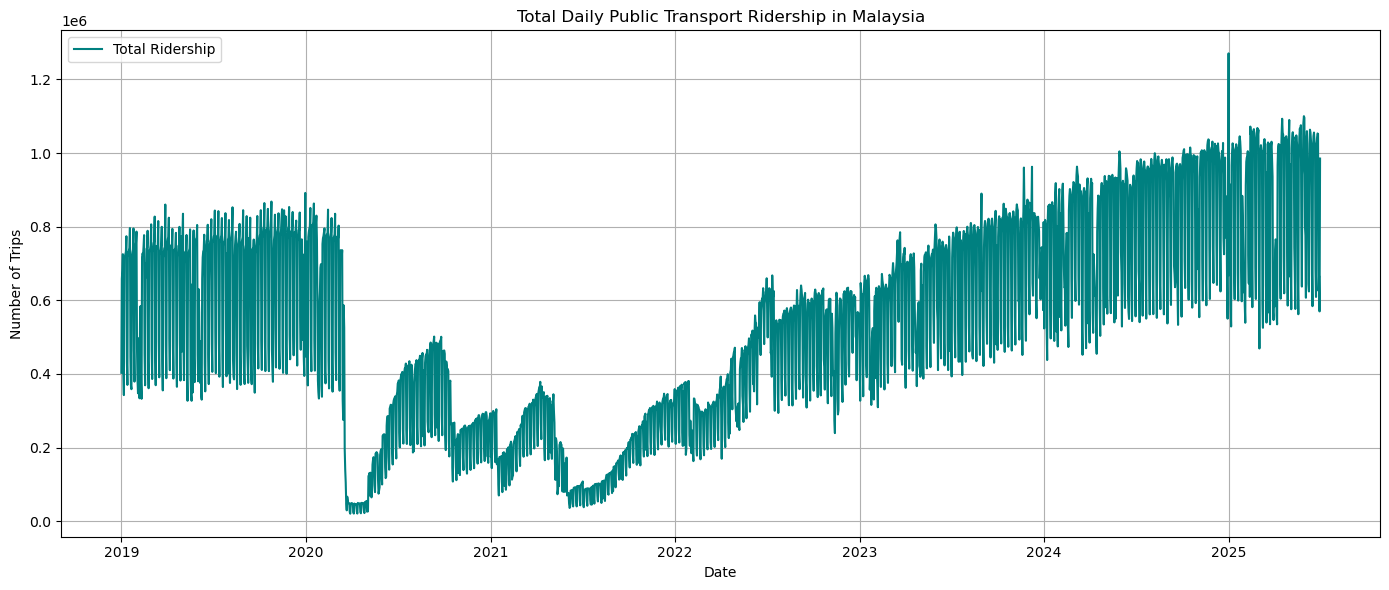

In [35]:
# Plot total ridership trend
plt.figure(figsize=(14,6))
plt.plot(df_reduced['date'], df_reduced['total_ridership'], label='Total Ridership', color='teal')
plt.title("Total Daily Public Transport Ridership in Malaysia")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The overall trend **remains consistent** with the pre-reduction data, as the majority of ridership patterns are driven by Urban Rail. While the total number of trips has decreased due to the removal of low-impact transport modes, the underlying trend is largely unaffected.

### Comparison between weekend and weekday average ridership

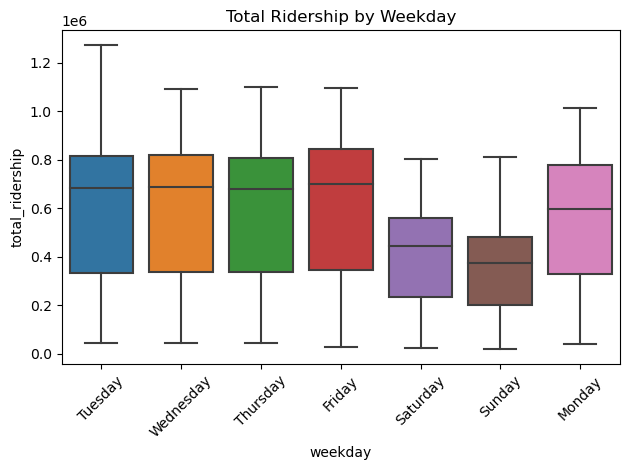

In [70]:
sns.boxplot(x='weekday', y='total_ridership', data=df_reduced)
plt.title("Total Ridership by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Since most of the data comes from **urban rail**, the overall ridership pattern remains consistent — showing a noticeable drop during weekends.

### Correlation Matrix

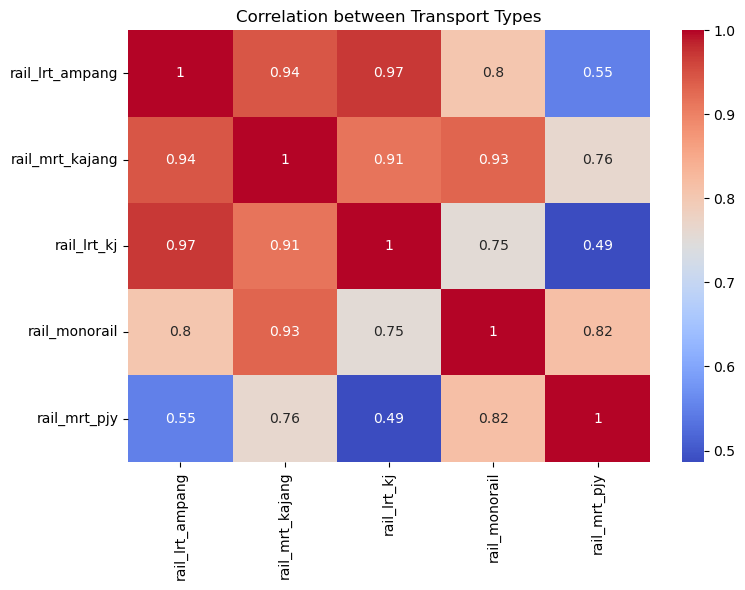

In [43]:
transport_cols = ['rail_lrt_ampang','rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail', 'rail_mrt_pjy']

corr = df_reduced[transport_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Transport Types")
plt.tight_layout()
plt.show()

#### **Consistency with Overall Insights**

This pattern aligns with your earlier findings that Urban rail systems move together, reinforcing the decision to group them for modeling (e.g., as total_urbanrail). In contrast, national rail and bus types (e.g., rail_intercity, rail_ets, bus_rkn). Strong Positive Correlations (above 0.90) are observed between: **`rail_lrt_kj`**, **`rail_lrt_ampang`**, and **`rail_mrt_kajang`** (0.91–0.97) These systems likely share similar usage patterns, possibly due to overlapping peak-hour demand, interconnected routes, or shared urban coverage.

Lower Correlation with MRT Putrajaya (**`rail_mrt_pjy`**): Although still moderately correlated (e.g., 0.55 with rail_lrt_ampang), rail_mrt_pjy shows relatively weaker alignment with other lines.

This may suggest that MRT Putrajaya caters to a slightly different passenger group or geographical corridor.

**Takeaway:**
The heatmap supports the earlier assumption that urban rail lines share strong behavioral consistency, while long-distance or low-ridership modes behave independently — validating your clustering, feature reduction, and modeling direction.

**MRT Putrajaya Line: Lower Correlation Explaination**

The rail_mrt_pjy line shows weak correlation with other urban rail lines mainly because it only began operating in June 2022, with full service starting in March 2023.

- Limited Data Coverage: Earlier months have no ridership records, which pulls down the correlation when comparing across the full timeline.

- Not a Behavior Issue: low correlation isn’t due to different usage patterns, but simply because of incomplete data. As more data accumulates, a stronger correlation may appear.

**Takeaway**: The lower correlation is not necessarily a sign of different usage patterns, but rather a data limitation due to late line operation. Future data updates may reveal a stronger relationship.
